In [1]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
%matplotlib inline

/home/ogura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
verbose=True
RESULT_DIR=Path("result/mnist")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [3]:
from tools.models import CNNClassifier,MLPClassifier

In [4]:
def reshape_mnist_mlp(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, -1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [5]:
def reshape_mnist_cnn(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, 28,28,1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_mlp,y_train_mlp=reshape_mnist_mlp(x_train,y_train)
x_test_mlp,y_test_mlp=reshape_mnist_mlp(x_test,y_test)
x_train_cnn,y_train_cnn=reshape_mnist_cnn(x_train,y_train)
x_test_cnn,y_test_cnn=reshape_mnist_cnn(x_test,y_test)

In [7]:
x_train_mlp.shape,x_train_cnn.shape

((60000, 784), (60000, 28, 28, 1))

In [8]:
mlp=MLPClassifier(input_dim=784,output_dim=10,result_dir=RESULT_DIR)
cnn=CNNClassifier(input_height=28,input_width=28,input_channels=1,result_dir=RESULT_DIR)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.
INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [9]:
mlp_history=mlp.fit(x_train_mlp,y_train_mlp,epochs=10)
cnn_history=cnn.fit(x_train_cnn,y_train_cnn,epochs=10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 74us/step - loss: 0.3735 - acc: 0.8911 - val_loss: 0.3151 - val_acc: 0.8971
Epoch 2/10
42000/42000 [==============================] - 1s 17us/step - loss: 0.1530 - acc: 0.9539 - val_loss: 0.1307 - val_acc: 0.9612
Epoch 3/10
42000/42000 [==============================] - 1s 18us/step - loss: 0.0993 - acc: 0.9693 - val_loss: 0.1171 - val_acc: 0.9643
Epoch 4/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.0721 - acc: 0.9782 - val_loss: 0.1096 - val_acc: 0.9697
Epoch 5/10
42000/42000 [==============================] - 1s 20us/step - loss: 0.0535 - acc: 0.9836 - val_loss: 0.0909 - val_acc: 0.9726
Epoch 6/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0960 - val_acc: 0.9737
Epoch 7/10
42000/42000 [==============================] - 1s 20us/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0963 - val_acc

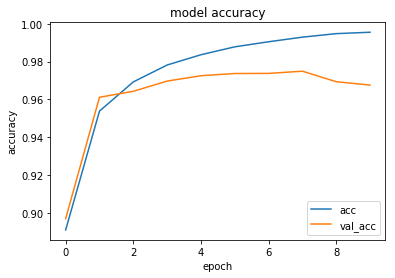

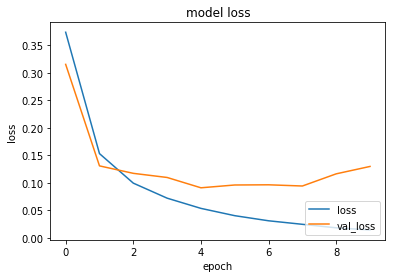

In [10]:
mlp.plot_history(epoch=10)

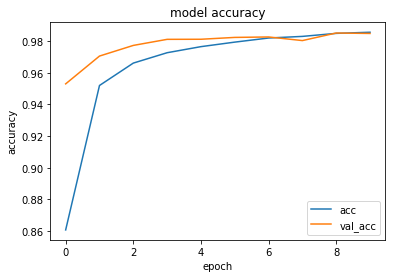

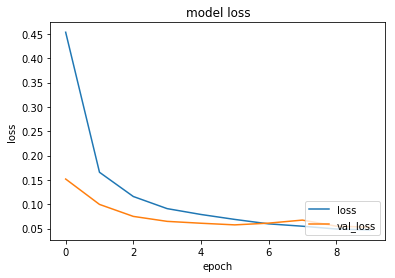

In [11]:
cnn.plot_history(epoch=10)

In [12]:
mlp.evaluate(x_test_mlp,y_test_mlp)

10000/10000 [==============================] - 0s 40us/step


{'loss': 0.11529687908066844, 'acc': 0.9714}

In [13]:
cnn.evaluate(x_test_cnn,y_test_cnn)

10000/10000 [==============================] - 1s 55us/step


{'loss': 0.04174730432359356, 'acc': 0.9866}